In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [4]:
#와인 등급 예측하기

file_url = "https://raw.githubusercontent.com/musthave-ML10/data_source/main/example_cluster.csv"

data = pd.read_csv(file_url)

data.head()

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520


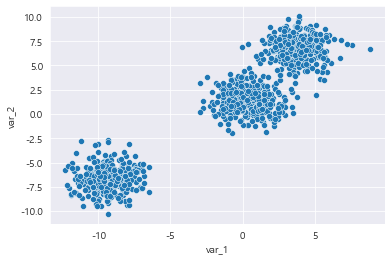

In [5]:
sns.scatterplot(x='var_1' , y='var_2' , data= data)

In [6]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters= 3 , random_state= 100)

#n_clusters ==> 그룹화 개수

kmeans_model.fit(data) # 학습

KMeans(n_clusters=3, random_state=100)

In [8]:
data['label'] = kmeans_model.predict(data) # 예측

data

,var_1,var_2,label
0,3.264413,6.929164,1
1,0.220814,2.251631,2
2,-8.786197,-8.333582,0
3,-0.008547,2.630791,2
4,4.912903,6.888520,1
...,...,...,...
995,4.678232,7.704404,1
996,5.250715,6.930948,1
997,-11.818752,-5.609853,0
998,0.613725,3.809334,2


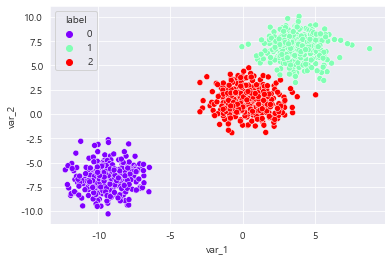

In [9]:
sns.scatterplot(x='var_1' , y='var_2' , data=data , hue='label' , palette='rainbow')

#하이퍼파라미터에 hue를 사용해 레이블별로 다른 색상 부여

In [10]:
kmeans_model.inertia_ # 이니셔 확인

3090.033

In [11]:
distance = []

for k in range(2, 10) :
    k_model = KMeans(n_clusters=k)
    k_model.fit(data) # 학습
    distance.append(k_model.inertia_) # 이너셔를 리스트에 저장

distance

[9908.551,
 3090.033,
 2718.242,
 2379.396,
 2049.791,
 1809.145,
 1585.542,
 1370.245]

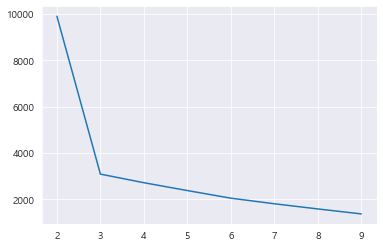

In [12]:
sns.lineplot(x= range(2,10) , y= distance)

In [13]:
#와인 등급 예측하기

file_url = "https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv"

data = pd.read_csv(file_url)

data.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [14]:
data['cc_num'].nunique()

100

In [16]:
data['cc_num'].value_counts()

4642255475285942       4386
4512828414983801773    4384
6534628260579800       4383
180048185037117        4382
3553629419254918       4381
                       ... 
4110266553600176127     738
3511058278399773        738
630412733309            736
4767265376804500        736
38859492057661          735
Name: cc_num, Length: 100, dtype: int64

In [17]:
data['category'].nunique()

11

In [18]:
customer_dummy = pd.get_dummies(data , columns = ['category']) # 더미 변수로 변환, 모든 범주확인 위해 drop_first= True 하지 않는다.and


customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [19]:
cat_list = customer_dummy.columns[2:]
cat_list

Index(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery', 'category_health_fitness',
       'category_home', 'category_kids_pets', 'category_misc',
       'category_personal_care', 'category_shopping', 'category_travel'],
      dtype='object')

In [20]:
for i in cat_list :
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt'] #금액으로 변수 업데이트

customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [21]:
customer_agg = customer_dummy.groupby('cc_num').sum() # cc_num 별 총 금액

customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg) , columns = customer_agg.columns, index = customer_agg.index) # 스케일링 후 데이터프레임으로 변환

scaled_df.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
